# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [178]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from HouseholdSpecializationModel import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

**Explain how you solve the model**

We illustrate the changes in $ \frac{H_F}{H_M} $   when varying $ \alpha \in \{0.25,0.50,0.75\} $ and $ \sigma = \{0.5,1.0,1.5\} $. 
$ \frac{\alpha}{1-\alpha} $ represent the productivity in home production and $ \sigma $ represent the elasticity of substitution. $ \frac{H_F}{H_M} $ displays the relationship for home production between females and males. Furthermore we assume that the choice set is discrete in hafl hours.

In [179]:
# Making the varying alpha and sigma
alpha_list = [0.25, 0.5, 0.75]
sigma_list = [0.5, 1.0, 1.5]

# Making a for loop for each combination of alpha and sigma and printing the results
for alpha in alpha_list:    
    for sigma in sigma_list:
        # assigning the different value to alpha and sigma
        model.par.alpha = alpha
        model.par.sigma = sigma

        # Solving the model with the new different values of alpha and sigma
        opt = model.solve_discrete()

        # Print results
        print(f"alpha = {alpha:.2f} and sigma = {sigma} | HF/HM = {opt.HF:.1f}/{opt.HM:.1f} = {opt.HF/opt.HM:.2f}")

/Users/frederikrundager/projects-2023-3500-8/inauguralproject/HouseholdSpecializationModel.py:63: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/frederikrundager/projects-2023-3500-8/inauguralproject/HouseholdSpecializationModel.py:63: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/frederikrundager/projects-2023-3500-8/inauguralproject/HouseholdSpecializationModel.py:68: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


alpha = 0.25 and sigma = 0.5 | HF/HM = 3.0/5.5 = 0.55
alpha = 0.25 and sigma = 1.0 | HF/HM = 2.0/6.5 = 0.31
alpha = 0.25 and sigma = 1.5 | HF/HM = 1.5/7.0 = 0.21
alpha = 0.50 and sigma = 0.5 | HF/HM = 4.5/4.5 = 1.00
alpha = 0.50 and sigma = 1.0 | HF/HM = 4.5/4.5 = 1.00
alpha = 0.50 and sigma = 1.5 | HF/HM = 4.5/4.5 = 1.00
alpha = 0.75 and sigma = 0.5 | HF/HM = 5.5/3.0 = 1.83
alpha = 0.75 and sigma = 1.0 | HF/HM = 6.5/2.0 = 3.25
alpha = 0.75 and sigma = 1.5 | HF/HM = 7.0/1.5 = 4.67


We conclude the following from the results:  

When $ \alpha < 0.5 $ the female work fewer hours at home compared to the male, due to being less productive at household work. 

When $ \alpha = 0.5 $ the female and male both work 4.5 hours at the household.

When $ \alpha > 0.5 $ the female work more hours at home compared to the male, due to being more productive at household work. 

$ \alpha $ can be interpreted as how effective the female is at doing household work, which is why a high $ \alpha $ will result in a greater part of household work to be done by the female and vice versa.

This aligns with our expectations since the production function is symmetrical and the wage for the female and the male are equal $ w_F = w_M = 1$.

# Question 2

Explain your code and procedure

We plot $ log\frac{H_F}{H_M} $ against $ log\frac{w_F}{w_M}$ for females wages varying $ w_F \in [0.8, 0.9, 1.0, 1.1, 1.2]$. We assume that choice set is discrete.

Text(0.5, 1.0, 'Working at home for different $w_F$')

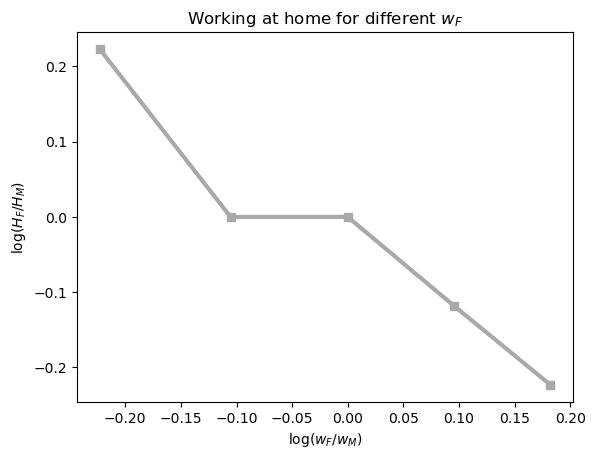

In [180]:
# Defining female wages
wf_vec = model.par.wF_vec

# Setting alpha=0.5 and sigma=1 back to initial values
model.par.alpha = 0.5
model.par.sigma = 1

# Making parameters for working at home and wages
# Because wM is equal to 1 we can ignore the denominator in the fraction wF/wM
log_HFHM = []
log_wf = []

# Making a for loop to find the optimal  for different female wages
for wf in wf_vec:
    model.par.wF = wf
    opt = model.solve_discrete()
    log_HFHM.append(np.log(opt.HF/opt.HM))
    log_wf.append(np.log(model.par.wF))

# Plot the results
plt.plot(log_wf, log_HFHM, color='darkgrey', lw=3, marker="s") # the female wage is equal to the relative becuase wM = 1
plt.xlabel("log($w_F/w_M$)")
plt.ylabel("log($H_F/H_M$)")
plt.title("Working at home for different $w_F$")

The figure above illustrate the logarithmic relationship between the relative home production and the relative wages between the female and the male when the choice set is discrete.

We see that when we increase the females wages relative to men, then the females share of working in the household decreases. This is because with the higher wage it becomes more attractive to work in the market than at home for the female. We notice that there seems to be no difference in the relative home production for when the female wages are between 0.9 an 1.0.

# Question 3

Explain your code and procedure

We plot $ log\frac{H_F}{H_M} $ against $ log\frac{w_F}{w_M}$ for females wages varying $ w_F \in [0.8, 0.9, 1.0, 1.1, 1.2]$. We now assume that choice set is continuous.

Text(0.5, 1.0, 'Working at home for different $w_F$')

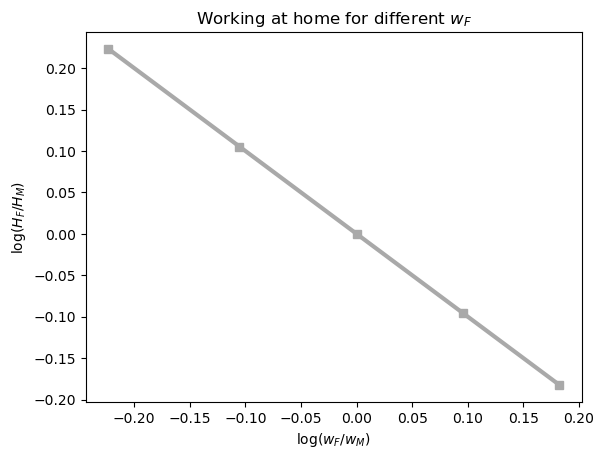

In [181]:
# Defining female wages
wf_vec = model.par.wF_vec

# Making parameters for working at home and wages
# Because wM is equal to 1 we can ignore the denominator in the fraction wF/wM
log_HFHM = []
log_wf = []

# Making a for loop to find the optimal  for different female wages
# We're only changing model.solve_discrete to model.solve, where we have solved for a continuous model 
for wf in wf_vec:
    model.par.wF = wf
    opt = model.solve()
    log_HFHM.append(np.log(opt.HF/opt.HM))
    log_wf.append(np.log(model.par.wF))

# Plot the results
plt.plot(log_wf, log_HFHM, color='darkgrey', lw=3, marker="s") # the female wage is equal to the relative becuase wM = 1
plt.xlabel("log($w_F/w_M$)")
plt.ylabel("log($H_F/H_M$)")
plt.title("Working at home for different $w_F$")

The graph above illustrate the logarithmic relationship between the relative home production and the relative wages between the female and the male when the choice set is continuous.

The graph illustrate the same result as in question 2, but now because the choice set is continuous the graph is smoothed out, as we possess better specified values.

# Question 4

We estimate values of $ \alpha $ and $ \sigma $ such that it minimizes this expression $ (\beta - \hat{\beta}_{0})^2 + (\beta_1 - \hat{\beta}_{1})^2 $. The values of $ \alpha $ and $ \sigma $ that minimizes $ (\beta - \hat{\beta}_{0})^2 + (\beta_1 - \hat{\beta}_{1})^2 $ is found by creating a loop that goes through different values of $ \alpha $ and $ \sigma $ until the expression is minimized.

In [182]:
# Solve the model for a vector of female wages
model = HouseholdSpecializationModelClass()
sol = model.solve_wF_vec(discrete=False)

# Print the results
print("HM:", sol.HM_vec)
print("LM:", sol.LM_vec)
print("LF:", sol.LF_vec)
print("HF:", sol.HF_vec)


# Run"Drive" and print alpha and sigma
model.estimate()
print(f"alpha and sigma values = {model.sol.alpha:.2f}, {model.sol.sigma:.2f}")


HM: [4.09251206 4.27104213 4.45450509 4.64194037 4.83260414]
LM: [5.88926757 5.16775106 4.45450924 3.75981793 3.08972892]
LF: [2.8697821  3.74928412 4.45446736 5.0219631  5.47961207]
HF: [5.11568981 4.74563915 4.45453136 4.21995238 4.02722718]


/Users/frederikrundager/projects-2023-3500-8/inauguralproject/HouseholdSpecializationModel.py:63: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/frederikrundager/projects-2023-3500-8/inauguralproject/HouseholdSpecializationModel.py:67: RuntimeWarning: invalid value encountered in double_scalars
  Q = C**par.omega*H**(1-par.omega)


    Beta0_hat =  0.40
    Beta1_hat =  -0.10
alpha and sigma values = 0.98, 0.10


# Question 5

    Beta0_hat =  0.40
    Beta1_hat =  -0.00
sigma value = 0.63, gamma value = 2.12 and pay gap procent = 0.78


Text(0.5, 1.0, 'Working at home for different $w_F$')

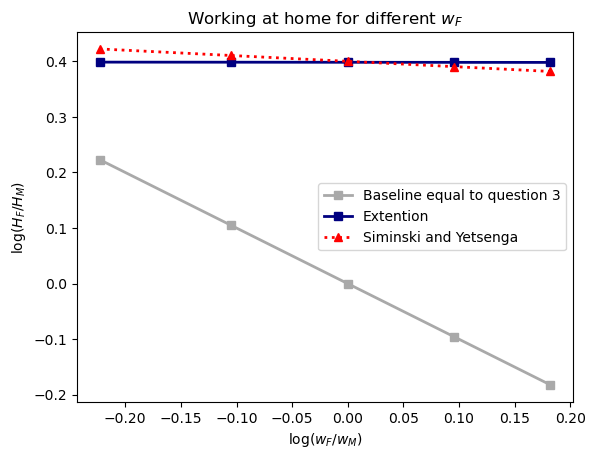

In [183]:
model = HouseholdSpecializationModelClass()
#sol = model.solve_wF_vec(discrete=False)

# Run"Drive" and print alpha and sigma
model.estimate5()
print(f"sigma value = {model.par.sigma:.2f}, gamma value = {model.sol.gammaM:.2f} and pay gap procent = {model.sol.gap:.2f}")

ysimyet = [0.4 - 0.1 * log_wfi for log_wfi in log_wf]
model5 = [model.sol.beta0 + model.sol.beta1 * log_wfi for log_wfi in log_wf]
plt.plot(log_wf, log_HFHM, color='darkgrey', lw=2, marker="s", label="Baseline equal to question 3")
plt.plot(log_wf, model5, color='navy', lw=2, marker="s", label="Extension")
plt.plot(log_wf, ysimyet, color='red', lw=2, marker="^", label="Siminski and Yetsenga", linestyle=":") 
plt.xlabel("log($w_F/w_M$)")
plt.ylabel("log($H_F/H_M$)")
plt.legend(loc="center right")
plt.title("Working at home for different $w_F$")

ADD CONCISE CONLUSION.